In [598]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-purchase-data/Car_Purchasing_Data.csv


In [599]:
data = pd.read_csv('/kaggle/input/car-purchase-data/Car_Purchasing_Data.csv',encoding='latin-1')

In [600]:
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [601]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [602]:
def plot_3chart(df, feature):

    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(27, 10))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='Red')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Probability Plot')
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('Blue')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='Green')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)

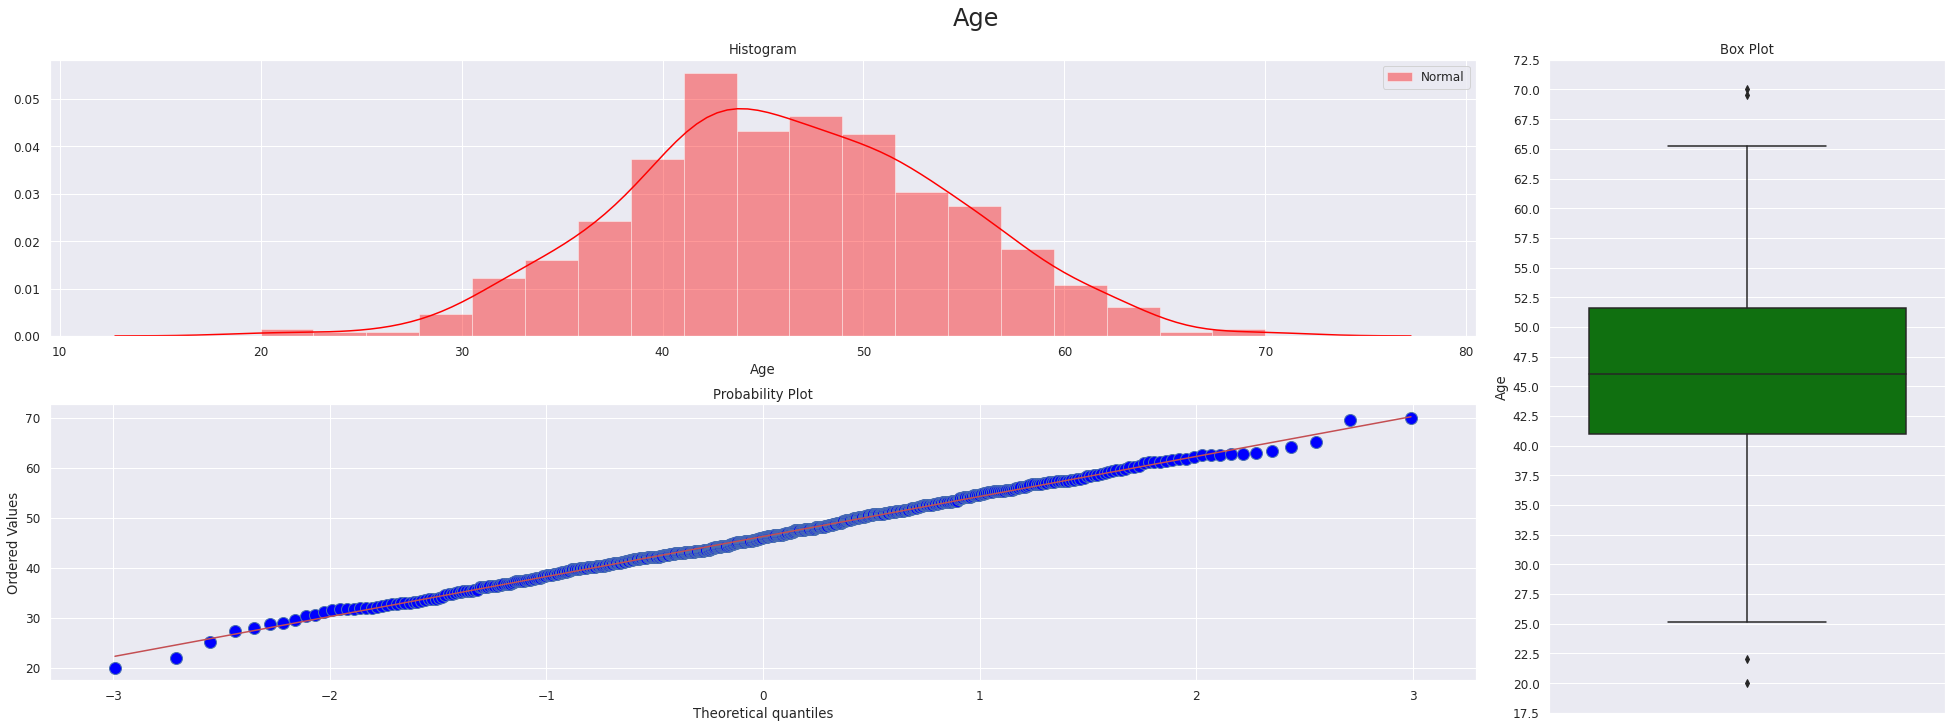

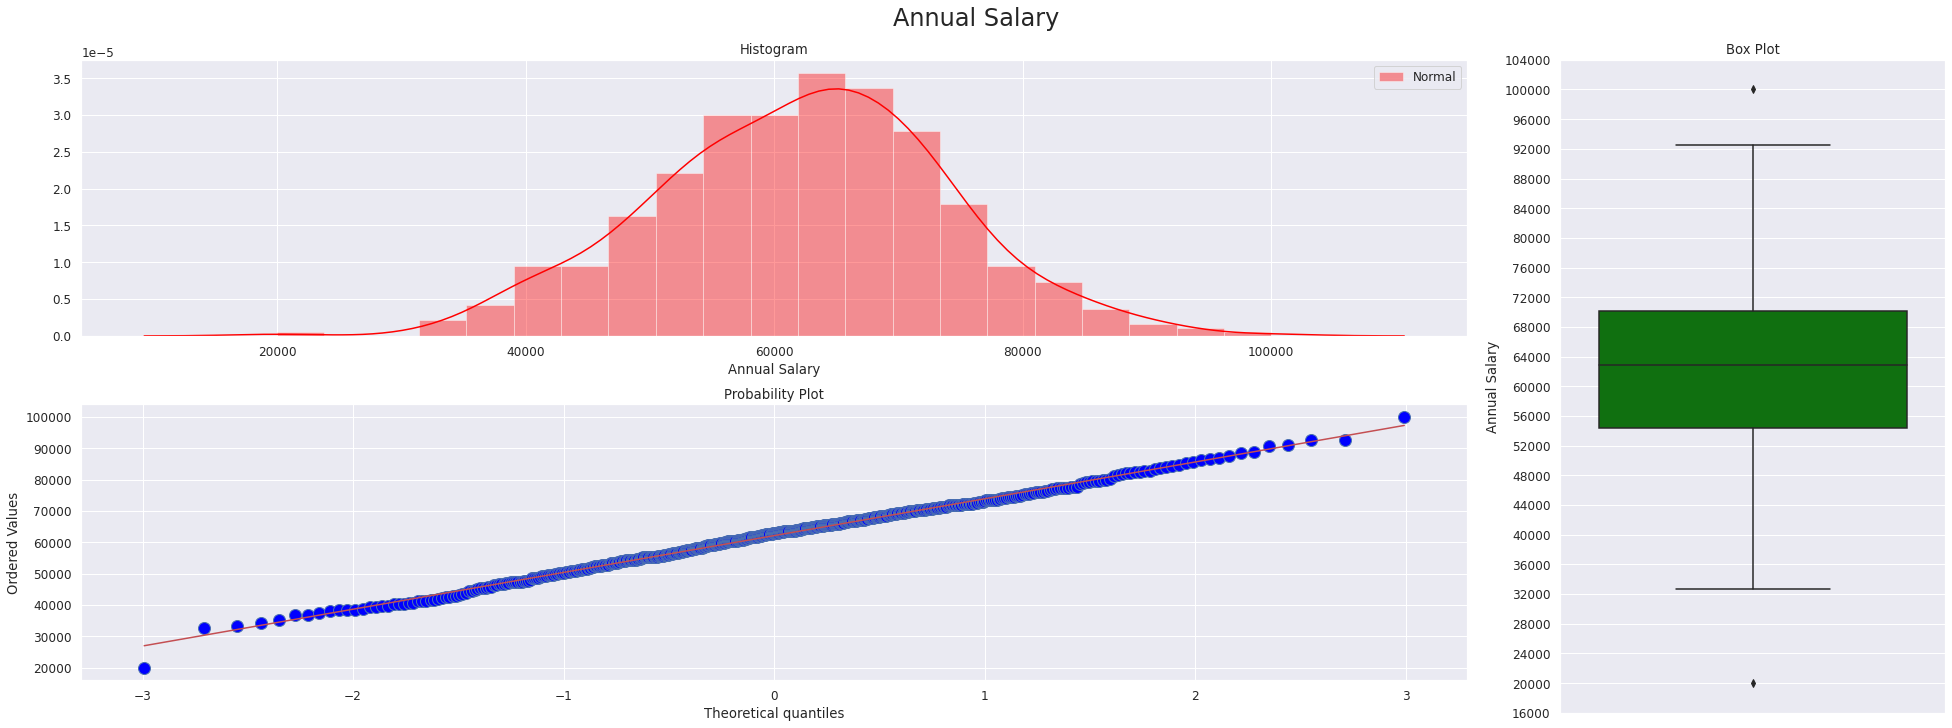

In [603]:
plot_3chart(data, 'Age')
plot_3chart(data,'Annual Salary')


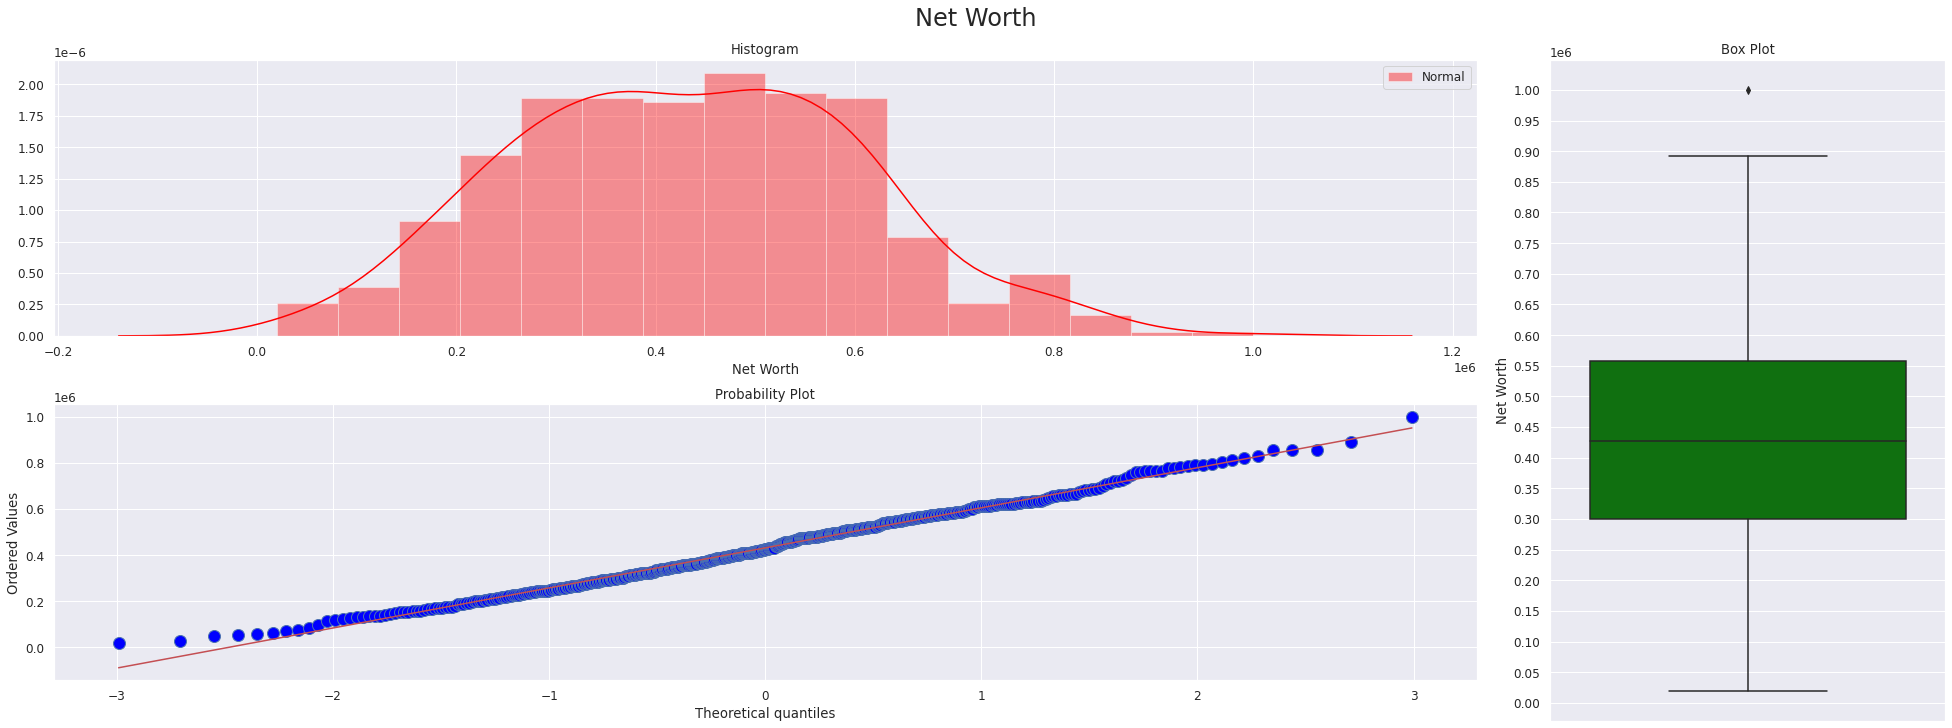

In [604]:
plot_3chart(data,'Net Worth')

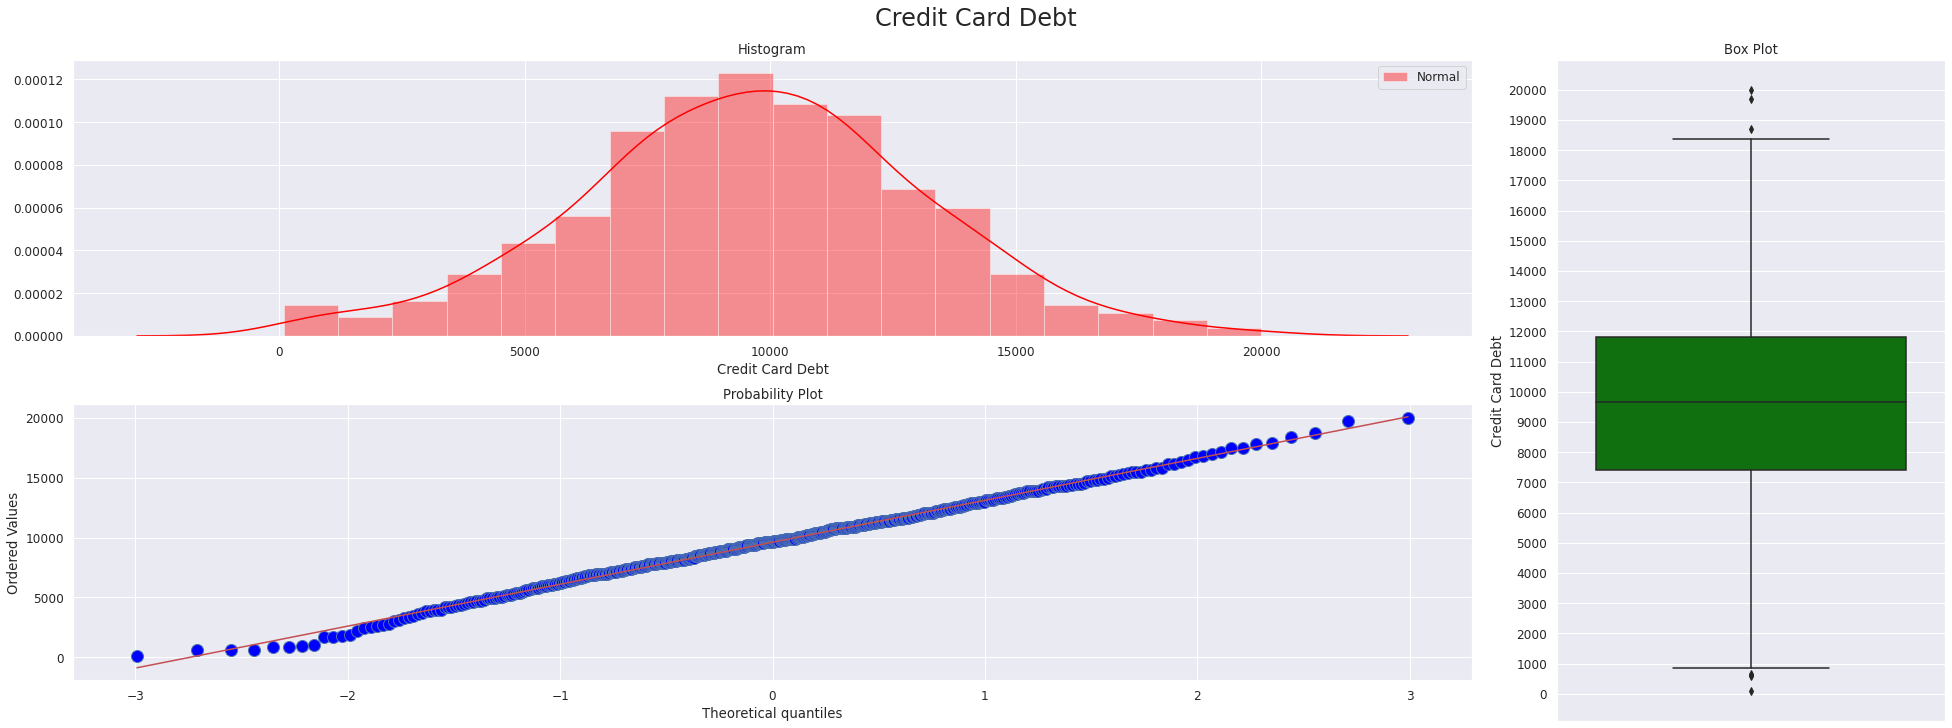

In [605]:
plot_3chart(data,'Credit Card Debt')

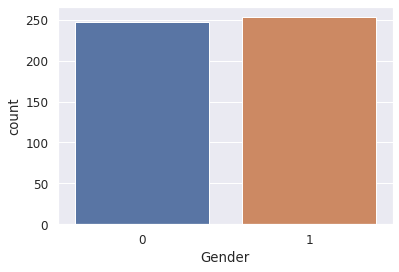

In [606]:
sns.countplot(data['Gender'])


In [607]:
fig = px.treemap(data, path=['Country'], values='Annual Salary',
                  color='Net Worth', hover_data=['Country'],
                  color_continuous_scale='dense', title='Countries with different annual salaries ')
fig.show()

In [608]:
lable = LabelEncoder()
data.Country = lable.fit_transform(data.Country)

In [609]:
X = data.drop(["Customer Name", 'Country',"Customer e-mail", "Car Purchase Amount",'Credit Card Debt'], axis=1)
y = data["Car Purchase Amount"]

In [610]:
X.head()

,Gender,Age,Annual Salary,Net Worth
0,0,41.851720,62812.09301,238961.2505
1,0,40.870623,66646.89292,530973.9078
2,1,43.152897,53798.55112,638467.1773
3,1,58.271369,79370.03798,548599.0524
4,1,57.313749,59729.15130,560304.0671


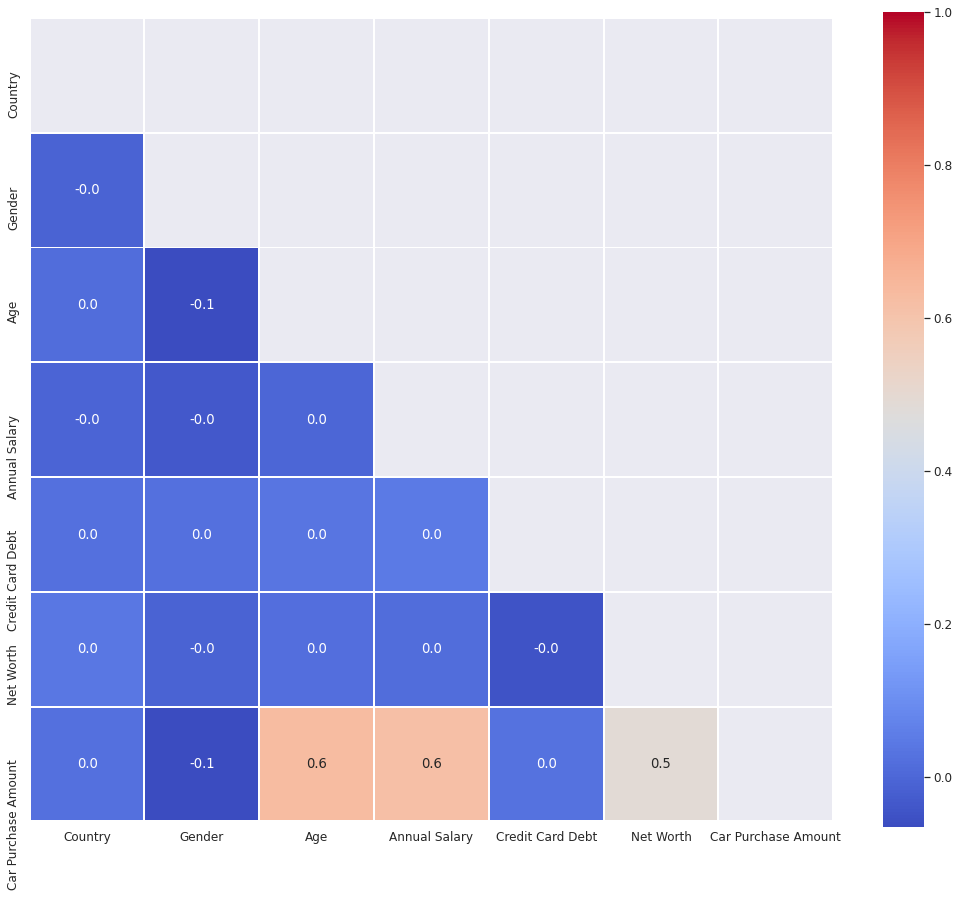

In [611]:
sns.set(font_scale=1.1)
correlation_train = data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()

In [612]:
y1 = y
y1=y1.values.reshape(-1,1)


In [613]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
#scaler = StandardScaler()
y1 = scaler.fit_transform(y1)

In [614]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [646]:
X_train

array([[0.        , 0.56285142, 0.46181088, 0.09837503],
       [1.        , 0.35787297, 0.74211147, 0.75707706],
       [1.        , 0.52410482, 0.44292551, 0.30296596],
       ...,
       [1.        , 0.51063684, 0.56470863, 0.48727189],
       [0.        , 0.44899573, 0.58022082, 0.50340817],
       [1.        , 0.67886994, 0.61110973, 0.75972584]])

In [616]:

scores = []
n = 100
model1 = RandomForestRegressor(n_estimators = n)
model1.fit(X_train, y_train)
scores.append(model1.score(X_test, y_test))

In [617]:
y_pred1 = model1.predict(X_test)


In [618]:
RFerror =  mean_absolute_error(y_test, y_pred1)

In [619]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GBRerror = mean_absolute_error(y_test, reg.predict(X_test))
regpred = reg.staged_predict(X_test)


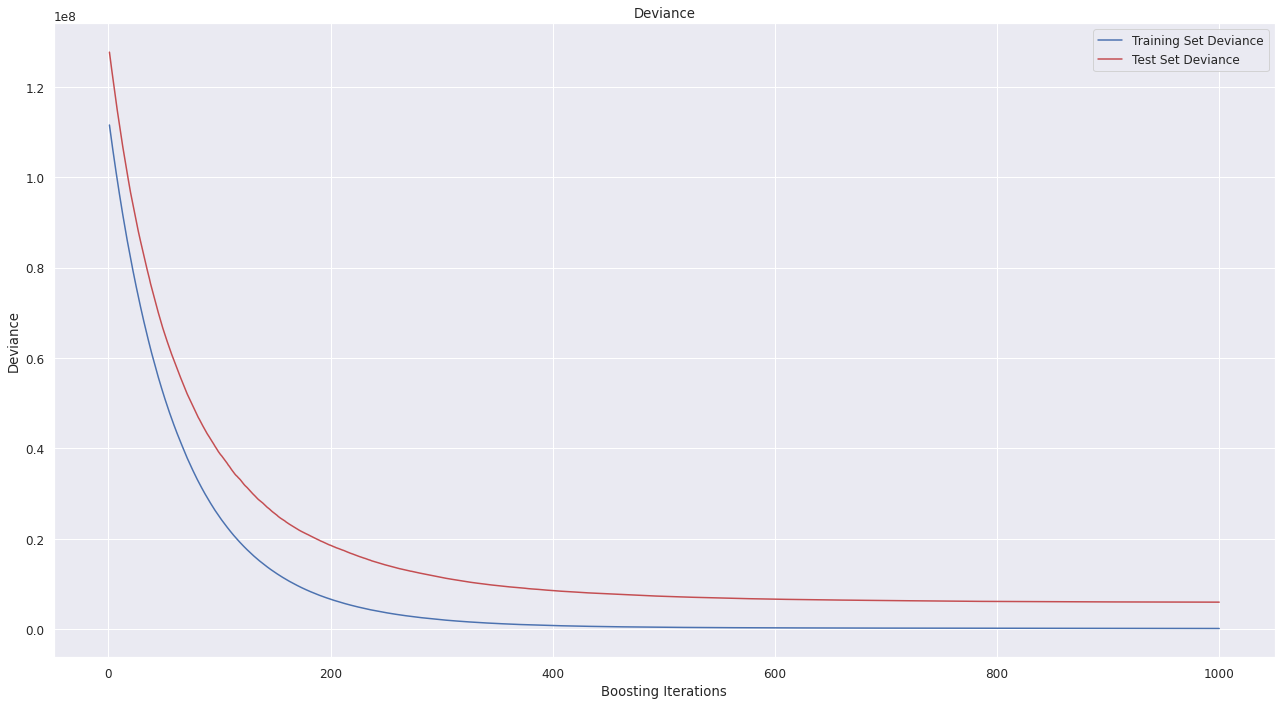

In [620]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(18, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [621]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
from sklearn.model_selection import cross_val_score
cv = 10
performance=cross_val_score(xgb,X,y,cv=cv,scoring="neg_mean_absolute_error",n_jobs=-1)
mae=-performance
xgb.fit(X,y)

y_pred3=xgb.predict(X_test)
print(mae)

[1269.56388308 1333.23667677 1023.23821358 1407.26396411 1604.07790591
 1226.99061833 1752.66918851 1043.47649406 1547.26031455 1272.7831496 ]


In [622]:
XGBerror = mae

In [623]:
print("Mean Absolute Errors by: Random Forest =",RFerror)
print("Gradient Boost = ",GBRerror)
print("XGB regressor = ",XGBerror.mean())

Mean Absolute Errors by: Random Forest = 1801.5448198466652
Gradient Boost =  1667.5497349813436
XGB regressor =  1348.0560408506249


# TRAINING ANN MODEL

In [624]:
X.shape
X=scaler.fit_transform(X)


In [625]:
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.15)

In [626]:
import tensorflow.keras 
from keras.models import Sequential 
from keras.layers import Dense 

model=Sequential()
model.add(Dense(80,input_dim=4,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_73 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 41        
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
_________________________________________________________________


In [627]:
epochs_hist=model.fit(X_train,y_train,epochs=200,batch_size=50,verbose=1,validation_split=0.2)


Train on 340 samples, validate on 85 samples
Epoch 1/200
340/340 [==============================] - 0s 355us/step - loss: 0.2164 - val_loss: 0.0925
Epoch 2/200
340/340 [==============================] - 0s 31us/step - loss: 0.0634 - val_loss: 0.0256
Epoch 3/200
340/340 [==============================] - 0s 31us/step - loss: 0.0296 - val_loss: 0.0270
Epoch 4/200
340/340 [==============================] - 0s 35us/step - loss: 0.0238 - val_loss: 0.0153
Epoch 5/200
340/340 [==============================] - 0s 35us/step - loss: 0.0130 - val_loss: 0.0089
Epoch 6/200
340/340 [==============================] - 0s 32us/step - loss: 0.0092 - val_loss: 0.0089
Epoch 7/200
340/340 [==============================] - 0s 33us/step - loss: 0.0082 - val_loss: 0.0080
Epoch 8/200
340/340 [==============================] - 0s 32us/step - loss: 0.0073 - val_loss: 0.0070
Epoch 9/200
340/340 [==============================] - 0s 36us/step - loss: 0.0067 - val_loss: 0.0064
Epoch 10/200
340/340 [==============

340/340 [==============================] - 0s 32us/step - loss: 1.6881e-05 - val_loss: 2.0849e-05
Epoch 77/200
340/340 [==============================] - 0s 36us/step - loss: 1.6146e-05 - val_loss: 2.0956e-05
Epoch 78/200
340/340 [==============================] - 0s 32us/step - loss: 1.5652e-05 - val_loss: 1.9269e-05
Epoch 79/200
340/340 [==============================] - 0s 31us/step - loss: 1.4852e-05 - val_loss: 1.9684e-05
Epoch 80/200
340/340 [==============================] - 0s 32us/step - loss: 1.5608e-05 - val_loss: 2.2561e-05
Epoch 81/200
340/340 [==============================] - 0s 32us/step - loss: 1.4865e-05 - val_loss: 1.9773e-05
Epoch 82/200
340/340 [==============================] - 0s 33us/step - loss: 1.3004e-05 - val_loss: 1.8200e-05
Epoch 83/200
340/340 [==============================] - 0s 33us/step - loss: 1.2617e-05 - val_loss: 1.8052e-05
Epoch 84/200
340/340 [==============================] - 0s 34us/step - loss: 1.2201e-05 - val_loss: 1.7297e-05
Epoch 85/200
3

340/340 [==============================] - 0s 31us/step - loss: 4.2848e-06 - val_loss: 9.4160e-06
Epoch 150/200
340/340 [==============================] - 0s 31us/step - loss: 4.2785e-06 - val_loss: 9.2355e-06
Epoch 151/200
340/340 [==============================] - 0s 33us/step - loss: 4.3379e-06 - val_loss: 9.7728e-06
Epoch 152/200
340/340 [==============================] - 0s 33us/step - loss: 4.3331e-06 - val_loss: 1.0251e-05
Epoch 153/200
340/340 [==============================] - 0s 31us/step - loss: 4.0669e-06 - val_loss: 1.0130e-05
Epoch 154/200
340/340 [==============================] - 0s 33us/step - loss: 4.2886e-06 - val_loss: 1.1294e-05
Epoch 155/200
340/340 [==============================] - 0s 35us/step - loss: 5.4683e-06 - val_loss: 8.9857e-06
Epoch 156/200
340/340 [==============================] - 0s 32us/step - loss: 5.1417e-06 - val_loss: 1.0838e-05
Epoch 157/200
340/340 [==============================] - 0s 32us/step - loss: 4.7638e-06 - val_loss: 9.4417e-06
Epoch 

In [628]:
y_predict=model.predict(X_test)
y_predict.shape

(75, 1)

In [629]:
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print(f'MAE = {mae}')
print(f'RMSE = {mse}')

MAE = 0.0021465841007008977
RMSE = 1.565008139012963e-05


In [638]:
ANNpredictions = pd.DataFrame(y_predict)
RFpredictions = pd.DataFrame(y_pred1)
XGBpredictions = pd.DataFrame(y_pred3)
GBRprediction = pd.DataFrame(regpred)
Xdata = pd.DataFrame(X)
ydata = pd.DataFrame(y)

# Mean Absolute Error of our Neural Network is far better than the Regressor Models.


In [649]:
Xdata.to_csv('Xdata.csv', index=False)
ydata.to_csv('ydata.csv', index=False)
ANNpredictions.to_csv('Predictedcarprices', index = False)